In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
df = pd.read_csv('freelance_platform_projects.csv')

In [3]:
df.head(50)

,Title,Category Name,Experience,Sub Category Name,Currency,Budget,Location,Freelancer Preferred From,Type,Date Posted,Description,Duration,Client Registration Date,Client City,Client Country,Client Currency,Client Job Title
0,Go through wordpress site to improve speed,Technology & Programming,Entry ($),Website Development,GBP,30.0,remote,ALL,fixed_price,2023-04-09 02:56:08,Need someone to go through Wordpress website (...,1 day or less,2022-11-18,Brisbane,Australia,USD,NaN
1,design concept for commercial building,Design,Entry ($),Interior/Exterior Design,USD,100.0,remote,ALL,fixed_price,2023-04-09 02:56:08,"design concept for commercial building , groun...",NaN,2010-09-03,Caracas,Venezuela,USD,NaN
2,SSH access to my server & PLESK,Technology & Programming,Entry ($),Website Development,EUR,15.0,remote,ALL,fixed_price,2023-04-09 02:04:45,I need to delete some backup files from the me...,NaN,2023-03-11,London,United Kingdom,GBP,NaN
3,Interiors Design blog writting,Writing & Translation,Intermediate ($$),Technical Writing,GBP,25.0,remote,ALL,hourly,2023-04-09 02:08:11,Hello! I'm looking for an experienced writer t...,NaN,2023-04-09,London,United Kingdom,GBP,NaN
4,Boost website seo,Digital Marketing,Intermediate ($$),SEO,GBP,30.0,remote,ALL,hourly,2023-04-09 02:08:11,I am getting ready to launch my bi weekly blog...,NaN,2023-04-09,London,United Kingdom,GBP,NaN
5,Website Update and Online Store,Design,Intermediate ($$),Web Design,GBP,100.0,remote,ALL,fixed_price,2023-04-09 02:05:58,Hello! I run a fitness website and I'm looking...,NaN,2022-01-29,Ilford,United Kingdom,GBP,NaN
6,Google ads facebook ads,Social Media,Entry ($),Facebook Marketing,GBP,10.0,remote,ALL,hourly,2023-04-09 02:08:11,I'm looking for a experienced person to help m...,NaN,2023-04-09,London,United Kingdom,GBP,NaN
7,Mix and master of song,Music & Audio,Intermediate ($$),Audio & Sound Mixing,GBP,88.0,remote,ALL,fixed_price,2023-04-09 02:04:59,I'm looking for a professional-quality mix and...,NaN,2022-01-29,Ilford,United Kingdom,GBP,NaN
8,Traffic and Sale Conversion,Digital Marketing,Intermediate ($$),eCommerce Marketing,GBP,105.0,remote,ALL,fixed_price,2023-04-09 01:23:17,Need assistance generating traffic to my websi...,NaN,2023-04-08,Wrexham,United Kingdom,GBP,NaN
9,Business Analyst Required For Supporting in Te...,Technology & Programming,Entry ($),Data Science & Analysis,GBP,200.0,remote,ALL,fixed_price,2023-04-09 02:05:20,I need a senior business analyst for a support...,NaN,2022-05-17,Stockport,United Kingdom,GBP,NaN


In [4]:
#check for missing values
df.isnull().sum()

Title                           0
Category Name                   0
Experience                      0
Sub Category Name               0
Currency                        0
Budget                          0
Location                        0
Freelancer Preferred From       0
Type                            0
Date Posted                     0
Description                     0
Duration                     8521
Client Registration Date        0
Client City                     0
Client Country                  0
Client Currency                 0
Client Job Title             6098
dtype: int64

In [5]:
df['Location'].value_counts()

remote            9178
remote_country     579
onsite              58
Name: Location, dtype: int64

C:\Users\satya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


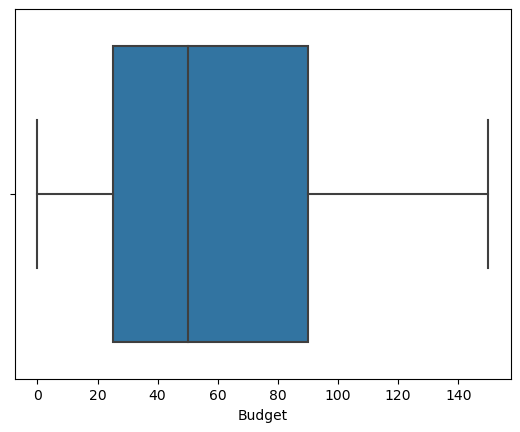

In [6]:
# eliminate the outliers in Budget column
outliers=np.where(df['Budget']>150)[0]
df= df.drop(outliers, axis=0)
sns.boxplot(df['Budget'])
plt.show()

In [7]:
# Drop the 'Duration' and 'Client Job Title' and 'Location' columns
df.drop(['Duration', 'Client Job Title','Location'], axis=1, inplace=True)

In [8]:
# Convert categorical variables to numerical using label encoding
cat_cols = ['Category Name','Experience','Sub Category Name','Type','Description']
label_encoders = {}

for col in cat_cols:
    label_encoders[col] = LabelEncoder()
    df[col] = label_encoders[col].fit_transform(df[col].astype(str))
df.head()

,Title,Category Name,Experience,Sub Category Name,Currency,Budget,Freelancer Preferred From,Type,Date Posted,Description,Client Registration Date,Client City,Client Country,Client Currency
0,Go through wordpress site to improve speed,6,0,99,GBP,30.0,ALL,0,2023-04-09 02:56:08,5319,2022-11-18,Brisbane,Australia,USD
1,design concept for commercial building,1,0,48,USD,100.0,ALL,0,2023-04-09 02:56:08,7066,2010-09-03,Caracas,Venezuela,USD
2,SSH access to my server & PLESK,6,0,99,EUR,15.0,ALL,0,2023-04-09 02:04:45,4196,2023-03-11,London,United Kingdom,GBP
3,Interiors Design blog writting,8,2,88,GBP,25.0,ALL,1,2023-04-09 02:08:11,862,2023-04-09,London,United Kingdom,GBP
4,Boost website seo,2,2,74,GBP,30.0,ALL,1,2023-04-09 02:08:11,2058,2023-04-09,London,United Kingdom,GBP


In [9]:
# Split the data into training and testing sets
X = df.drop(['Budget', 'Title', 'Currency', 'Freelancer Preferred From', 'Date Posted', 'Client Registration Date', 'Client City', 'Client Country', 'Client Currency'], axis=1)
y = df['Budget']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

# Linear Regression

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [22]:
# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [23]:
# Make predictions on the testing set
y_pred = model.predict(X_test)


In [24]:
# Evaluate the model using mean squared error and R-squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')

Mean Squared Error: 1047.39
R-squared: 0.35


In [25]:
# check the predictions
pred= model.predict(X_train)
pred[:5]

array([ 29.3597031 , 103.42835459,  54.34088401,  55.06613411,
        60.08429173])

In [26]:
pred=model.predict(X_test)
pred[:5]

array([59.65059174, 54.41514251, 82.70834884, 55.06472369, 99.19978353])

# Random Forest Regression

In [11]:
from sklearn.ensemble import RandomForestRegressor

In [12]:
# Creating the Random Forest Regression model
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [13]:
# Making predictions on the testing set
y_pred = rf_reg.predict(X_test)

In [15]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [16]:
# Evaluating the model using various metrics
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R-squared Score:", r2_score(y_test, y_pred))

Mean Absolute Error: 19.6210019509476
Mean Squared Error: 808.5418124257573
Root Mean Squared Error: 28.43486965726689
R-squared Score: 0.49639558821002316


In [19]:
pred=rf_reg.predict(X_test)
pred[:5]

array([29.2 , 60.05, 94.27, 28.  , 91.92])